<a href="https://colab.research.google.com/github/Sylvia53/Portfolio/blob/main/%E7%B3%96%E5%B0%BF%E7%97%85_AutoML%E6%A8%A1%E5%9E%8B%E7%AF%84%E6%9C%AC_%E5%BB%BA%E7%AB%8B%E6%A8%A1%E5%9E%8B_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 參數設定

### <font color='red'>請修改下面的參數</font>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#載入測試用資料
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/團專檔案/diabetes_prediction_dataset/diabetes_prediction_dataset.csv')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# eval_metric 評估指標
# options for classification:
#  ['accuracy', 'balanced_accuracy', 'f1', 'f1_macro', 'f1_micro', 'f1_weighted',
#  'roc_auc', 'roc_auc_ovo_macro', 'average_precision', 'precision', 'precision_macro',
#  'precision_micro', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro',
# 'recall_weighted', 'log_loss', 'pac_score']
#
# Options for regression:
#  ['root_mean_squared_error', 'mean_squared_error', 'mean_absolute_error',
#  'median_absolute_error', 'mean_absolute_percentage_error','r2']
eval_metric = 'roc_auc'

# data_filename 訓練用資料的檔名
data_filename = '/團專檔案/diabetes_prediction_dataset/diabetes_prediction_dataset.csv'

# prediction_filename 模型預測結果的檔名
prediction_filename = '/output/diabetes_train_prediction.csv'

# model_path 模型儲存資料夾
model_path = '/output/model_diabetes_train'

# leaderboard_filename 模型評比結果檔名
leaderboard_filename = '/output/leaderboard_diabetes_train.csv'

In [ ]:
# input_field 模型輸入的欄位名稱
input_field = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

# target_field 模型預測欄位名稱
target_field = 'diabetes'


In [ ]:
print(data.columns)  # 列出所有欄位名稱
print(data.columns.duplicated())  # 顯示哪些欄位是重複的


Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')
[False False False False False False False False False]


In [ ]:
print(working_field)  # 列出 working_field 的內容
print(len(working_field), len(set(working_field)))  # 檢查總長度 vs 唯一值長度


['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
9 9


In [ ]:
working_field = list(dict.fromkeys(input_field + [target_field]))  # 去重複


### 環境設定

In [ ]:
#檢查執行環境是不是Colab
environment_type = 1
environment_base_folder = ''
if environment_type == 1:
    from google.colab import drive
    drive.mount('/content/drive') # 此處需要登入google帳號
    environment_base_folder = '/content/drive/MyDrive'
    ! pip install autogluon
    ! sudo apt-get install python3-dev graphviz libgraphviz-dev pkg-config
    ! pip install pygraphviz

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pkg-config is already the newest version (0.29.2-1ubuntu3).
python3-dev is already the newest version (3.10.6-1~22.04.1).
graphviz is already the newest version (2.42.2-6ubuntu0.1).
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


### 載入資料

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv(environment_base_folder+data_filename)
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


### <font color='blue'>顯示資料表欄位名稱</font>

In [ ]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
# input_field 模型輸入的欄位名稱
input_field = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

# target_field 模型預測欄位名稱
target_field = 'diabetes'


# 訓練模型

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [ ]:
#Autogluon Recall Boost 完整調參
from autogluon.tabular import TabularPredictor
from imblearn.over_sampling import SMOTE
import pandas as pd

# 加載數據
data = pd.read_csv("/content/drive/MyDrive/團專檔案/diabetes_prediction_dataset/diabetes_prediction_dataset.csv")

# 定義目標變量和特徵
target_field = 'diabetes'
X = data.drop(columns=[target_field])
y = data[target_field]

# SMOTE 進行過採樣
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
resampled_data = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=[target_field])], axis=1)

# AutoGluon 訓練模型
predictor = TabularPredictor(
    label=target_field,
    eval_metric="f1",   # 或 "recall"
    path="AutogluonModels/"
).fit(
    train_data=resampled_data,
    num_bag_folds=5,         # Bagging 提升穩定性
    num_stack_levels=2,      # Stacking 提升泛化性
    hyperparameter_tune=True, # 自動調參
    time_limit=3600          # 限時 1 小時
)

# 預測
predictions = predictor.predict(X_test)

# 評估模型
performance = predictor.evaluate(data_test)



ValueError: could not convert string to float: 'Female'

In [ ]:
# 確保 working_field 不重複
working_field = list(dict.fromkeys(input_field + [target_field]))  # ✅ 去除重複欄位

# 確保 DataFrame 沒有問題
if data.columns.duplicated().any():
    print("⚠️ 發現重複欄位，自動修正...")
    data = data.loc[:, ~data.columns.duplicated()]  # ✅ 刪除重複欄位

# 定義 AutoGluon 調參策略
hyperparameter_tune_kwargs = 'auto'  # ✅ 自動調參

# 訓練模型
model = TabularPredictor(
    label=target_field,
    eval_metric="f1",   # 或 "recall"
    path=environment_base_folder + model_path
).fit(
    train_data=data[working_field],
    num_bag_folds=5,
    num_stack_levels=2,  # Stacking 提升泛化性
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,  # ✅ 正確寫法
    time_limit=3600
)



# # 確保 working_field 不重複
# working_field = list(dict.fromkeys(input_field + [target_field]))  # ✅ 去除重複欄位

# # 確保 DataFrame 沒有問題
# if data.columns.duplicated().any():
#     print("⚠️ 發現重複欄位，自動修正...")
#     data = data.loc[:, ~data.columns.duplicated()]  # ✅ 刪除重複欄位

# # 訓練模型
# model = TabularPredictor(
#     label=target_field,
#     eval_metric="f1",   # 或 "recall"
#     #eval_metric=eval_metric,
#     path=environment_base_folder + model_path
# ).fit(train_data=data[working_field], num_bag_folds=5 )


Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.33 GB / 12.67 GB (73.6%)
Disk Space Avail:   61.61 GB / 100.00 GB (61.6%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         : Strong accuracy with fast inference spee

+-----------------------------------------------------------+
| Configuration for experiment     NeuralNetFastAI_BAG_L1   |
+-----------------------------------------------------------+
| Search algorithm                 SearchGenerator          |
| Scheduler                        FIFOScheduler            |
| Number of trials                 1000                     |
+-----------------------------------------------------------+

View detailed results here: /content/drive/MyDrive/output/model_diabetes_train/models/NeuralNetFastAI_BAG_L1


No model was trained during hyperparameter tuning NeuralNetFastAI_BAG_L1... Skipping this model.
Hyperparameter tuning model: XGBoost_BAG_L1 ... Tuning model for up to 110.7s of the 3060.08s of remaining time.


	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.36%)
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	0.8061	 = Validation score   (f1)
	65.13s	 = Training   runtime
	0.74s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L1 ... Tuning model for up to 110.7s of the 2994.64s of remaining time.


+----------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch_BAG_L1   |
+----------------------------------------------------------+
| Search algorithm                 SearchGenerator         |
| Scheduler                        FIFOScheduler           |
| Number of trials                 1000                    |
+----------------------------------------------------------+

View detailed results here: /content/drive/MyDrive/output/model_diabetes_train/models/NeuralNetTorch_BAG_L1


No model was trained during hyperparameter tuning NeuralNetTorch_BAG_L1... Skipping this model.
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 110.70s of the 2878.87s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.32%)


	0.8054	 = Validation score   (f1)
	43.98s	 = Training   runtime
	0.95s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 2827.90s of remaining time.
	Ensemble Weights: {'LightGBM_BAG_L1/T1': 0.875, 'CatBoost_BAG_L1/T1': 0.125}
	0.8064	 = Validation score   (f1)
	13.84s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting 11 L2 models, fit_strategy="sequential" ...
Hyperparameter tuning model: LightGBMXT_BAG_L2 ... Tuning model for up to 153.45s of the 2813.8s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.60%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.68%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.64%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGB

+-----------------------------------------------------------+
| Configuration for experiment     NeuralNetFastAI_BAG_L2   |
+-----------------------------------------------------------+
| Search algorithm                 SearchGenerator          |
| Scheduler                        FIFOScheduler            |
| Number of trials                 1000                     |
+-----------------------------------------------------------+

View detailed results here: /content/drive/MyDrive/output/model_diabetes_train/models/NeuralNetFastAI_BAG_L2


No model was trained during hyperparameter tuning NeuralNetFastAI_BAG_L2... Skipping this model.
Hyperparameter tuning model: XGBoost_BAG_L2 ... Tuning model for up to 153.45s of the 1996.0s of remaining time.


	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.86%)
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L2/T1 ...
	0.8055	 = Validation score   (f1)
	81.0s	 = Training   runtime
	0.75s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L2 ... Tuning model for up to 153.45s of the 1914.71s of remaining time.


+----------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch_BAG_L2   |
+----------------------------------------------------------+
| Search algorithm                 SearchGenerator         |
| Scheduler                        FIFOScheduler           |
| Number of trials                 1000                    |
+----------------------------------------------------------+

View detailed results here: /content/drive/MyDrive/output/model_diabetes_train/models/NeuralNetTorch_BAG_L2


Fitted model: NeuralNetTorch_BAG_L2/5eacee6f ...
	0.8047	 = Validation score   (f1)
	142.57s	 = Training   runtime
	3.63s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 153.45s of the 1756.74s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.73%)


	0.807	 = Validation score   (f1)
	61.69s	 = Training   runtime
	1.06s	 = Validation runtime
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.00s of the 1690.47s of remaining time.
	Ensemble Weights: {'LightGBM_BAG_L2/T3': 0.95, 'NeuralNetTorch_BAG_L2/5eacee6f': 0.05}
	0.8074	 = Validation score   (f1)
	15.8s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting 11 L3 models, fit_strategy="sequential" ...
Hyperparameter tuning model: LightGBMXT_BAG_L3 ... Tuning model for up to 137.01s of the 1674.43s of remaining time.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.66%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.76%)
	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.71%)
	Stopping HPO to satisfy time limit...
Fitted model

+-----------------------------------------------------------+
| Configuration for experiment     NeuralNetFastAI_BAG_L3   |
+-----------------------------------------------------------+
| Search algorithm                 SearchGenerator          |
| Scheduler                        FIFOScheduler            |
| Number of trials                 1000                     |
+-----------------------------------------------------------+

View detailed results here: /content/drive/MyDrive/output/model_diabetes_train/models/NeuralNetFastAI_BAG_L3


No model was trained during hyperparameter tuning NeuralNetFastAI_BAG_L3... Skipping this model.
Hyperparameter tuning model: XGBoost_BAG_L3 ... Tuning model for up to 137.01s of the 942.14s of remaining time.


	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.96%)
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L3/T1 ...
	0.8065	 = Validation score   (f1)
	74.35s	 = Training   runtime
	1.11s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L3 ... Tuning model for up to 137.01s of the 867.44s of remaining time.


+----------------------------------------------------------+
| Configuration for experiment     NeuralNetTorch_BAG_L3   |
+----------------------------------------------------------+
| Search algorithm                 SearchGenerator         |
| Scheduler                        FIFOScheduler           |
| Number of trials                 1000                    |
+----------------------------------------------------------+

View detailed results here: /content/drive/MyDrive/output/model_diabetes_train/models/NeuralNetTorch_BAG_L3


No model was trained during hyperparameter tuning NeuralNetTorch_BAG_L3... Skipping this model.
Fitting model: LightGBMLarge_BAG_L3 ... Training model for up to 137.01s of the 722.62s of remaining time.


	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.87%)
	0.8064	 = Validation score   (f1)
	55.87s	 = Training   runtime
	0.93s	 = Validation runtime
Fitting model: WeightedEnsemble_L4 ... Training model for up to 360.00s of the 660.99s of remaining time.
	Ensemble Weights: {'LightGBMXT_BAG_L3/T2': 0.95, 'RandomForestEntr_BAG_L3': 0.05}
	0.8094	 = Validation score   (f1)
	35.78s	 = Training   runtime
	0.04s	 = Validation runtime
AutoGluon training complete, total runtime = 2975.13s ... Best model: WeightedEnsemble_L4 | Estimated inference throughput: 766.3 rows/s (20000 batch size)
Enabling decision threshold calibration (calibrate_decision_threshold='auto', metric is valid, problem_type is 'binary')
Calibrating decision threshold to optimize metric f1 | Checking 51 thresholds...
Calibrating decision threshold via fine-grained search | Checking 38 thresholds...
	Base Threshold: 0.500	| val: 0.8094
	Best Thresh

### <font color='blue'>最佳模型名稱</font>

In [ ]:
#model.get_model_best()
from autogluon.tabular import TabularPredictor

predictor = TabularPredictor.load("/content/drive/MyDrive/output/model_diabetes_train/")  # 載入模型
best_model = predictor.model_best  # 取得最佳模型
print("最佳模型:", best_model)


最佳模型: WeightedEnsemble_L4


### <font color='blue'>預測問題種類</font>

In [ ]:
model.problem_type

'binary'

### <font color='blue'>評估指標</font>

In [ ]:
model.eval_metric

f1

### <font color='blue'>使用的演算法</font>

In [ ]:
# model.get_model_names()
from autogluon.tabular import TabularPredictor

model = TabularPredictor.load("/content/drive/MyDrive/output/model_diabetes_train")
print(model.model_names()) # 正確取得模型名稱



['KNeighborsUnif_BAG_L1', 'KNeighborsDist_BAG_L1', 'LightGBMXT_BAG_L1/T1', 'LightGBM_BAG_L1/T1', 'LightGBM_BAG_L1/T2', 'RandomForestGini_BAG_L1', 'RandomForestEntr_BAG_L1', 'CatBoost_BAG_L1/T1', 'ExtraTreesGini_BAG_L1', 'ExtraTreesEntr_BAG_L1', 'XGBoost_BAG_L1/T1', 'LightGBMLarge_BAG_L1', 'WeightedEnsemble_L2', 'LightGBMXT_BAG_L2/T1', 'LightGBMXT_BAG_L2/T2', 'LightGBMXT_BAG_L2/T3', 'LightGBM_BAG_L2/T1', 'LightGBM_BAG_L2/T2', 'LightGBM_BAG_L2/T3', 'RandomForestGini_BAG_L2', 'RandomForestEntr_BAG_L2', 'CatBoost_BAG_L2/T1', 'ExtraTreesGini_BAG_L2', 'ExtraTreesEntr_BAG_L2', 'XGBoost_BAG_L2/T1', 'NeuralNetTorch_BAG_L2/5eacee6f', 'LightGBMLarge_BAG_L2', 'WeightedEnsemble_L3', 'LightGBMXT_BAG_L3/T1', 'LightGBMXT_BAG_L3/T2', 'LightGBMXT_BAG_L3/T3', 'LightGBM_BAG_L3/T1', 'LightGBM_BAG_L3/T2', 'RandomForestGini_BAG_L3', 'RandomForestEntr_BAG_L3', 'CatBoost_BAG_L3/T1', 'ExtraTreesGini_BAG_L3', 'ExtraTreesEntr_BAG_L3', 'XGBoost_BAG_L3/T1', 'LightGBMLarge_BAG_L3', 'WeightedEnsemble_L4']


### <font color='blue'>leaderboard</font>

In [ ]:
leaderboard = model.leaderboard(extra_info=True, silent=True)
leaderboard.to_csv(environment_base_folder+leaderboard_filename)
model.leaderboard(silent=True)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L4,0.809357,f1,54.943736,1626.755929,0.035189,35.775352,4,True,41
1,LightGBMXT_BAG_L3/T2,0.809354,f1,51.861459,1504.149417,0.599376,43.406238,3,True,30
2,LightGBMXT_BAG_L3/T1,0.808847,f1,51.662798,1503.940134,0.400716,43.196954,3,True,29
3,LightGBMXT_BAG_L3/T3,0.808136,f1,51.757749,1505.587953,0.495666,44.844773,3,True,31
4,WeightedEnsemble_L3,0.807398,f1,30.190627,737.603537,0.036222,15.804991,3,True,28
5,LightGBM_BAG_L2/T3,0.807369,f1,26.524204,579.230217,0.996933,56.061485,2,True,19
6,LightGBMLarge_BAG_L2,0.807022,f1,26.587519,584.862926,1.060247,61.694194,2,True,27
7,RandomForestGini_BAG_L3,0.806733,f1,56.667207,1550.751297,5.405124,90.008117,3,True,34
8,LightGBMXT_BAG_L2/T2,0.806582,f1,26.256808,570.250510,0.729537,47.081778,2,True,15
9,XGBoost_BAG_L3/T1,0.806501,f1,52.376238,1535.092572,1.114155,74.349393,3,True,39


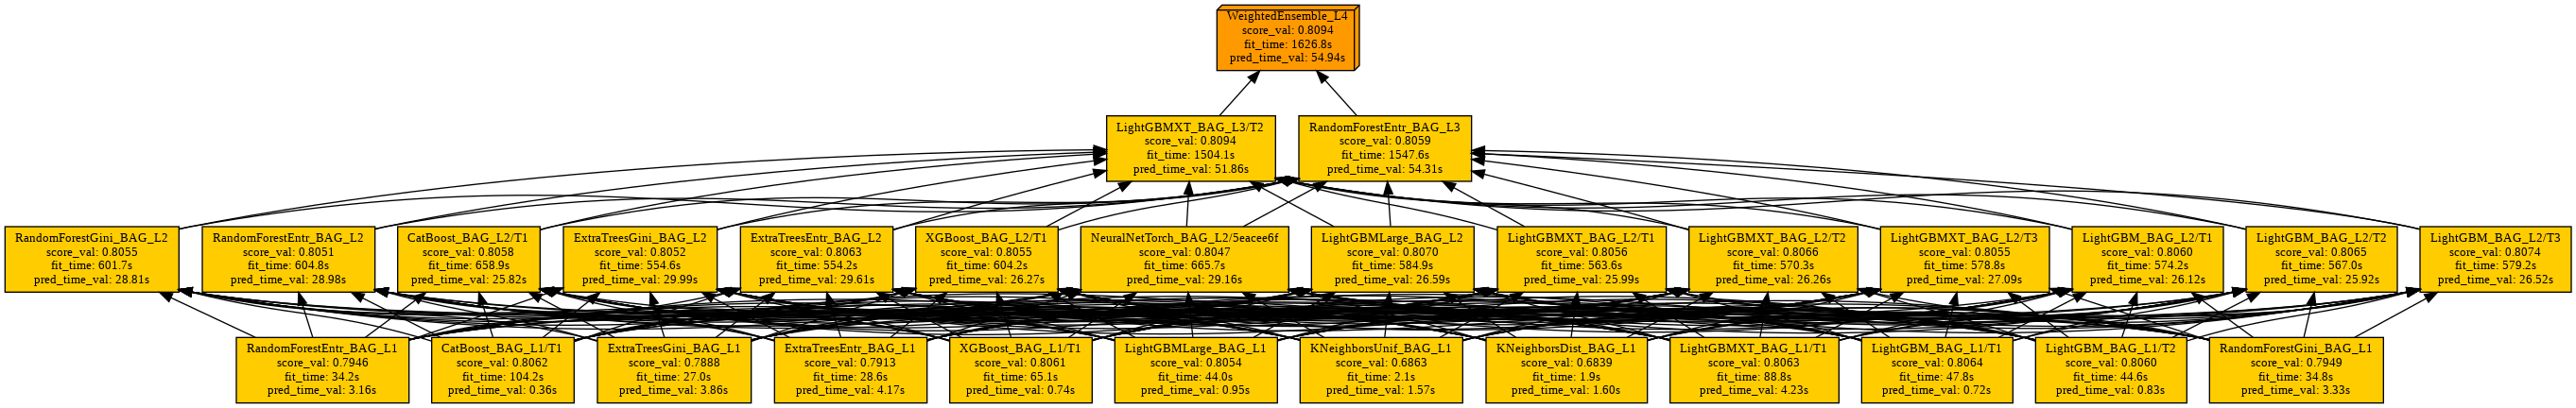

In [ ]:
if environment_type == 1:
  path_to_png = model.plot_ensemble_model()
  from IPython.display import Image, display
  display(Image(filename=path_to_png))

# 輸出預測結果

In [ ]:
if (model.problem_type != 'regression'):
  prediction_p = model.predict_proba(data)
prediction = model.predict(data)

In [ ]:
pred_data = data.copy()
pred_data['/output/model_diabetes_train'] = prediction
pred_data = pd.concat([pred_data,prediction_p], axis=1, join='inner')
pred_data.to_csv(environment_base_folder+prediction_filename)

1.   訓練 AutoGluon TabularPredictor
2.   計算訓練組預測結果 (train_predictions)
3.   計算測試組預測結果 (test_predictions)
4.   計算評估指標 (evaluate) 來比較模型在 訓練組與測試組 的表現
5.   儲存預測結果為 CSV 檔案 (train_predictions.csv, test_predictions.csv)












In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

# 設定特徵欄位 (確保沒有重複欄位)
working_field = list(dict.fromkeys(input_field + [target_field]))

# 建立並訓練模型
predictor = TabularPredictor(
    label=target_field,
    eval_metric=eval_metric,  # 評估指標 (如 accuracy, f1, etc.)
    path=environment_base_folder + model_path
).fit(train_data=data[working_field], num_bag_folds=5)

# **1️⃣ 計算訓練組的預測結果**
train_predictions = predictor.predict(data[working_field])  # 預測訓練數據
train_predictions_df = pd.DataFrame({
    "Actual": data[target_field],  # 真實標籤
    "Predicted": train_predictions  # 模型預測值
})
print("🔹 訓練組預測結果：")
print(train_predictions_df.head())

# **2️⃣ 計算測試組的預測結果**
test_data = pd.read_csv("/content/drive/MyDrive/團專檔案/diabetes_prediction_dataset.csv/diabetes_prediction_dataset.csv")  # 替換為你的測試數據集
test_predictions = predictor.predict(test_data[working_field])  # 預測測試數據
test_predictions_df = pd.DataFrame({
    "Actual": test_data[target_field],  # 真實標籤 (如果有)
    "Predicted": test_predictions  # 模型預測值
})
print("\n🔹 測試組預測結果：")
print(test_predictions_df.head())

# **3️⃣ 計算模型評估結果**
train_score = predictor.evaluate(data[working_field])  # 訓練組評估
test_score = predictor.evaluate(test_data[working_field])  # 測試組評估

print("\n🎯 訓練組評估結果:", train_score)
print("🎯 測試組評估結果:", test_score)

# **4️⃣ 儲存預測結果**
train_predictions_df.to_csv("train_predictions.csv", index=False)
test_predictions_df.to_csv("test_predictions.csv", index=False)
print("\n✅ 預測結果已儲存！")


Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       8.99 GB / 12.67 GB (70.9%)
Disk Space Avail:   60.30 GB / 100.00 GB (60.3%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         : Strong accuracy with fast inference spee

🔹 訓練組預測結果：
   Actual  Predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       0          0


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/團專檔案/diabetes_prediction_dataset.csv/diabetes_prediction_dataset.csv'

# 儲存模型

In [ ]:
import pickle

result = {}
result['input_field'] = input_field
result['target_field'] = target_field

with open(environment_base_folder+model_path+'/used_field.bin', 'wb') as handle:
    pickle.dump(result, handle)

In [ ]:
model.save()

# 欄位重要性

In [ ]:
model.feature_importance(data)

Computing feature importance via permutation shuffling for 8 features using 5000 rows with 5 shuffle sets...
	25.23s	= Expected runtime (5.05s per shuffle set)
	13.83s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
HbA1c_level,0.181789,0.019540,1.577562e-05,5,0.222023,0.141555
blood_glucose_level,0.089382,0.003033,1.587519e-07,5,0.095626,0.083138
age,0.018781,0.001814,1.030485e-05,5,0.022516,0.015047
bmi,0.005631,0.001764,1.018390e-03,5,0.009262,0.001999
smoking_history,0.001142,0.000524,4.096509e-03,5,0.002220,0.000063
hypertension,0.001105,0.000284,4.811635e-04,5,0.001690,0.000520
heart_disease,0.000703,0.000517,1.920963e-02,5,0.001767,-0.000362
gender,0.000593,0.000673,6.008660e-02,5,0.001979,-0.000793
